# Dimensionality Reduction Example

Using the IMDB data, feature matrix and apply dimensionality reduction to this matrix via PCA and SVD.

In [1]:
%matplotlib inline

In [2]:
import json
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.sparse import lil_matrix

from sklearn.neighbors import DistanceMetric

from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

In [3]:
actor_name_map = {}
movie_actor_map = {}
actor_genre_map = {}


with open("../data/imdb_movies_2000to2022.prolific.json", "r") as in_file:
    for line in in_file:
        
        # Read the movie on this line and parse its json
        this_movie = json.loads(line)
                    
        # Add all actors to the id->name map
        for actor_id,actor_name in this_movie['actors']:
            actor_name_map[actor_id] = actor_name
            
        # For each actor, add this movie's genres to that actor's list
        for actor_id,actor_name in this_movie['actors']:
            this_actors_genres = actor_genre_map.get(actor_id, {})
            
            # Increment the count of genres for this actor
            for g in this_movie["genres"]:
                this_actors_genres[g] = this_actors_genres.get(g, 0) + 1
                
            # Update the map
            actor_genre_map[actor_id] = this_actors_genres
            
        # Finished with this film
        movie_actor_map[this_movie["imdb_id"]] = ({
            "movie": this_movie["title"],
            "actors": set([item[0] for item in this_movie['actors']]),
            "genres": this_movie["genres"]
        })

In [4]:
# Get all actors as an index for a dataframe
index = actor_genre_map.keys()

# Get the genre-counts for each actor in the index
rows = [actor_genre_map[k] for k in index]

# Create the data frame from these rows, with the actors as index
df = pd.DataFrame(rows, index=index)

# Fill NAs with zero, as NA means the actor has not starred in that genre
df = df.fillna(0)

df

,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Horror,Documentary,Sport,News,Family,Music,,Western,Short,Reality-TV
nm0000212,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0413168,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0000630,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,3.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0005227,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
nm0864851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9504284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm10592896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm7216750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0936300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apply PCA to Feature Matrix

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [6]:
matrix_dense = df.to_numpy()


In [27]:
use_pca = False
use_svd = False

if use_pca:
    pca = PCA(n_components=16)
    pca.fit(matrix_dense)
    matrix_reduced = pca.transform(matrix_dense)

elif use_svd:
    svd = TruncatedSVD(n_components=4)
    svd.fit(matrix_dense)
    matrix_reduced = svd.transform(matrix_dense)

else:
    tsne = TSNE(n_components=2)
    matrix_reduced = tsne.fit_transform(matrix_dense)

/Users/cbuntain/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cbuntain/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [28]:
np.mean(matrix_reduced, axis=0)

array([-0.34631816,  1.5148199 ], dtype=float32)

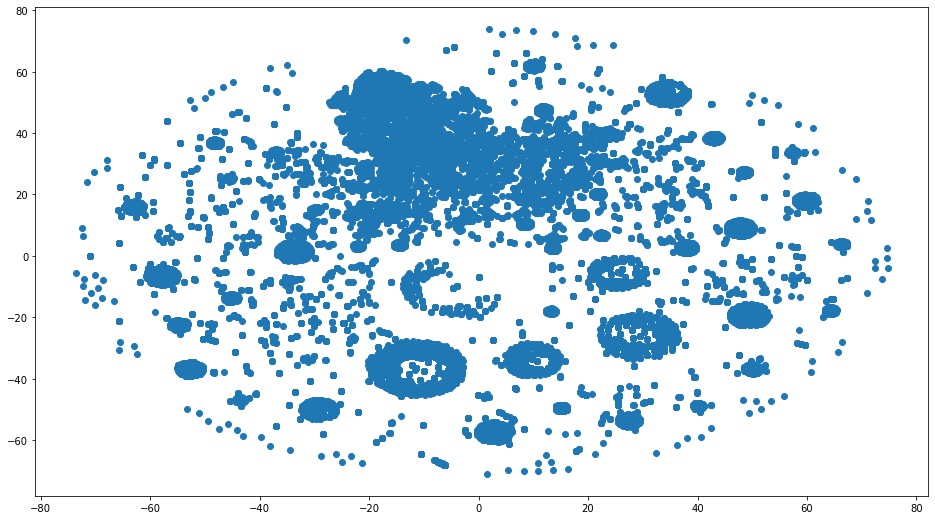

In [29]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

ax.scatter(matrix_reduced[:,0], matrix_reduced[:,1])

## Find Similar Movies in Reduced Dimensional Space

In [19]:
#Setting the actor we will be comparing to
# target_actor_id = 'nm1165110' # Chris Hemsworth
target_actor_id = 'nm0413168' # Hugh Jackman
# target_actor_id = 'nm0005351' # Ryan Reynolds

In [20]:
query_idx = [idx for idx,m in enumerate(df.index) if m == target_actor_id][0]
query_idx

1

In [21]:
query_v = matrix_reduced[query_idx,:]

In [22]:
query_v

array([21.79637269,  2.91864983,  2.35886318, -9.64999792])

In [23]:
# get distances between all films and query film
distances = pairwise_distances(matrix_reduced, [query_v], metric='euclidean')


In [24]:
distances_df = pd.DataFrame(distances, columns=["distance"])
for idx,row in distances_df.sort_values(by="distance", ascending=True).head(20).iterrows():
    print(idx, actor_name_map[df.index[idx]], row["distance"])

1 Hugh Jackman 0.0
73 Chris Evans 2.7810050837235685
1983 Suniel Shetty 2.8571710167447932
17341 Samantha Ruth Prabhu 3.0360239995204634
5004 Nassar 3.05039089137775
3969 Chris Pine 3.488601348182215
79 Johnny Depp 3.722217024837947
1600 Anil Kapoor 3.8213007147505844
2107 Salman Khan 4.0017250748850035
1397 Jamie Foxx 4.180582290913717
835 Robert Downey Jr. 4.2416665001518865
4343 Michael Peña 4.613500919083192
6897 Channing Tatum 4.652020953241296
685 Daniel Craig 5.021116118743398
112 Will Smith 5.149976749297809
11295 Raashi Khanna 5.165029291369698
934 Cuba Gooding Jr. 5.456346706313816
298 Angelina Jolie 5.666916500967698
67 Mel Gibson 5.709537335637198
10861 Kajal Aggarwal 5.7733213356346855
